In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_PATH = 'tom_jerry.jpg'

In [3]:
image = cv2.imread(IMG_PATH)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

---
#### ***Applying Gaussian Blur***
---

In [4]:
smoothed = cv2.GaussianBlur(gray, (5,5), 1.4)

---
#### ***Gradient Calculation***
---

In [5]:
grad_x = cv2.Sobel(smoothed, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(smoothed, cv2.CV_64F, 0, 1, ksize=3)

---
#### ***Magnitude and Direction of Gradient***
---

In [6]:
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x) * 180 / np.pi
angle[angle < 0] += 180

---
#### ***Non Maximum Supression***
---

In [7]:
M, N = magnitude.shape
nms = np.zeros_like(magnitude, dtype=np.uint8)

In [8]:
direction = ((angle + 22.5) // 45) % 4

In [9]:
for i in range(1, M-1):
    for j in range(1, N-1):
        if direction[i,j] == 0:  # 0 deg
            neighbors = [magnitude[i, j+1], magnitude[i, j-1]]
            
        elif direction[i,j] == 1:  # 45 deg
            neighbors = [magnitude[i+1, j-1], magnitude[i-1, j+1]]
            
        elif direction[i,j] == 2:  # 90 deg
            neighbors = [magnitude[i+1, j], magnitude[i-1, j]]
            
        else:  # 135 deg
            neighbors = [magnitude[i-1, j-1], magnitude[i+1, j+1]]
        
        if magnitude[i,j] >= max(neighbors):
            nms[i,j] = magnitude[i,j]

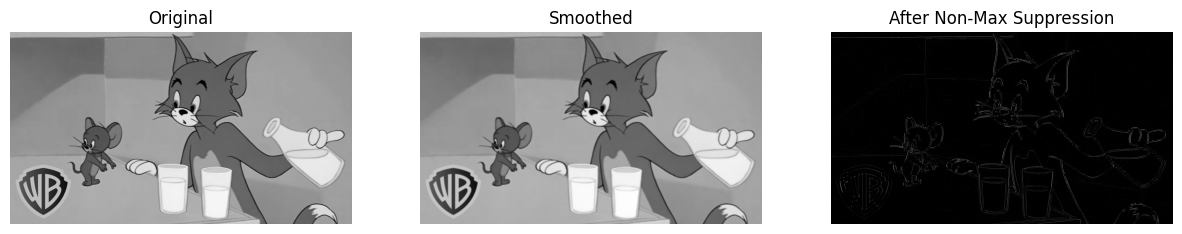

In [10]:
plt.figure(figsize=(15,6))
titles = ['Original', 'Smoothed', 'After Non-Max Suppression']
images = [gray, smoothed, nms]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

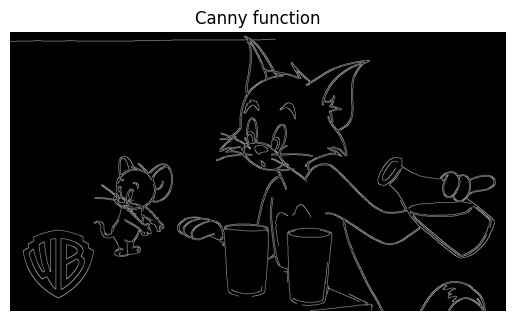

In [13]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Canny function")
plt.axis('off')
plt.show()